# Notebook 8: Costes computacionales

En este notebook analizamos los costes computacionales de los modelos entrenados, incluyendo:
- Tiempo de entrenamiento
- Métricas de rendimiento (RMSE, MAE)
- Emisiones de CO₂

In [8]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de archivos de emisiones

Empleamos el archivo generado por CodeCarbon en la ejecución del tracker en el Notebook 7.

In [15]:
results_path = Path("../results/emissions.csv")
emissions_df = pd.read_csv(results_path)
emissions_df = emissions_df.tail(12).reset_index(drop=True)
emissions_df

,timestamp,project_name,run_id,experiment_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,...,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue,wue
0,2025-11-23T18:39:47,codecarbon,e25d6559-65de-48fe-bf32-477dc5b98397,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,1.315517,0.000009,0.000007,130.0,0.0,10.0,...,Intel(R) Core(TM) i5-6400 CPU @ 2.70GHz,NaN,NaN,-3.6463,40.4235,7.898472,machine,N,1.0,0.0
1,2025-11-23T18:40:13,codecarbon,d56643d3-6891-4e6a-b9e2-f3f22bcd85bd,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,3.328910,0.000023,0.000007,130.0,0.0,10.0,...,Intel(R) Core(TM) i5-6400 CPU @ 2.70GHz,NaN,NaN,-3.6463,40.4235,7.898472,machine,N,1.0,0.0
2,2025-11-23T18:41:17,codecarbon,7989006c-e71f-4625-a015-4d806df44987,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,5.970303,0.000040,0.000007,130.0,0.0,10.0,...,Intel(R) Core(TM) i5-6400 CPU @ 2.70GHz,NaN,NaN,-3.6463,40.4235,7.898472,machine,N,1.0,0.0
3,2025-11-23T18:43:29,codecarbon,e3b1fa47-9a76-44fe-a242-22e3bed84c5b,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,10.590504,0.000072,0.000007,130.0,0.0,10.0,...,Intel(R) Core(TM) i5-6400 CPU @ 2.70GHz,NaN,NaN,-3.6463,40.4235,7.898472,machine,N,1.0,0.0
4,2025-11-23T18:46:58,codecarbon,f76dc49d-1d23-4514-8ee8-17c313d24476,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,5.290380,0.000036,0.000007,130.0,0.0,10.0,...,Intel(R) Core(TM) i5-6400 CPU @ 2.70GHz,NaN,NaN,-3.6463,40.4235,7.898472,machine,N,1.0,0.0
5,2025-11-23T18:47:20,codecarbon,67d24cb5-d6e2-43d5-9c1f-0647d89b14a2,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,7.891914,0.000053,0.000007,130.0,0.0,10.0,...,Intel(R) Core(TM) i5-6400 CPU @ 2.70GHz,NaN,NaN,-3.6463,40.4235,7.898472,machine,N,1.0,0.0
6,2025-11-23T18:48:18,codecarbon,bb72d6f7-b932-4eb4-9dbe-139725f3894a,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,9.896768,0.000067,0.000007,130.0,0.0,10.0,...,Intel(R) Core(TM) i5-6400 CPU @ 2.70GHz,NaN,NaN,-3.6463,40.4235,7.898472,machine,N,1.0,0.0
7,2025-11-23T18:50:26,codecarbon,d258f687-fb9e-4c15-b4ea-52c1a3d888f2,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,11.596795,0.000078,0.000007,130.0,0.0,10.0,...,Intel(R) Core(TM) i5-6400 CPU @ 2.70GHz,NaN,NaN,-3.6463,40.4235,7.898472,machine,N,1.0,0.0
8,2025-11-23T18:53:44,codecarbon,f6c05002-790f-4b13-b7d9-d67cce411300,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,5.062120,0.000034,0.000007,130.0,0.0,10.0,...,Intel(R) Core(TM) i5-6400 CPU @ 2.70GHz,NaN,NaN,-3.6463,40.4235,7.898472,machine,N,1.0,0.0
9,2025-11-23T18:55:52,codecarbon,3712ee8b-ecfb-4c99-b8cf-f7164ea7aa6f,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,7.975790,0.000054,0.000007,130.0,0.0,10.0,...,Intel(R) Core(TM) i5-6400 CPU @ 2.70GHz,NaN,NaN,-3.6463,40.4235,7.898472,machine,N,1.0,0.0


In [16]:
len(emissions_df)

12

# Etiquetado del experimento

Como solo tenemos un archivo, asignamos una etiqueta única en la columna `source`.
Esto permite graficar o comparar de forma consistente, incluso si añadimos más experimentos después.


In [17]:
labels = [
    "random_10", "random_25", "random_50", "random_75",
    "informed_users_10", "informed_users_25",
    "informed_users_50", "informed_users_75",
    "informed_items_10", "informed_items_25",
    "informed_items_50", "informed_items_75"
]

emissions_df["source"] = labels
emissions_df


,timestamp,project_name,run_id,experiment_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,...,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue,wue,source
0,2025-11-23T18:39:47,codecarbon,e25d6559-65de-48fe-bf32-477dc5b98397,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,1.315517,0.000009,0.000007,130.0,0.0,10.0,...,NaN,NaN,-3.6463,40.4235,7.898472,machine,N,1.0,0.0,random_10
1,2025-11-23T18:40:13,codecarbon,d56643d3-6891-4e6a-b9e2-f3f22bcd85bd,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,3.328910,0.000023,0.000007,130.0,0.0,10.0,...,NaN,NaN,-3.6463,40.4235,7.898472,machine,N,1.0,0.0,random_25
2,2025-11-23T18:41:17,codecarbon,7989006c-e71f-4625-a015-4d806df44987,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,5.970303,0.000040,0.000007,130.0,0.0,10.0,...,NaN,NaN,-3.6463,40.4235,7.898472,machine,N,1.0,0.0,random_50
3,2025-11-23T18:43:29,codecarbon,e3b1fa47-9a76-44fe-a242-22e3bed84c5b,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,10.590504,0.000072,0.000007,130.0,0.0,10.0,...,NaN,NaN,-3.6463,40.4235,7.898472,machine,N,1.0,0.0,random_75
4,2025-11-23T18:46:58,codecarbon,f76dc49d-1d23-4514-8ee8-17c313d24476,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,5.290380,0.000036,0.000007,130.0,0.0,10.0,...,NaN,NaN,-3.6463,40.4235,7.898472,machine,N,1.0,0.0,informed_users_10
5,2025-11-23T18:47:20,codecarbon,67d24cb5-d6e2-43d5-9c1f-0647d89b14a2,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,7.891914,0.000053,0.000007,130.0,0.0,10.0,...,NaN,NaN,-3.6463,40.4235,7.898472,machine,N,1.0,0.0,informed_users_25
6,2025-11-23T18:48:18,codecarbon,bb72d6f7-b932-4eb4-9dbe-139725f3894a,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,9.896768,0.000067,0.000007,130.0,0.0,10.0,...,NaN,NaN,-3.6463,40.4235,7.898472,machine,N,1.0,0.0,informed_users_50
7,2025-11-23T18:50:26,codecarbon,d258f687-fb9e-4c15-b4ea-52c1a3d888f2,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,11.596795,0.000078,0.000007,130.0,0.0,10.0,...,NaN,NaN,-3.6463,40.4235,7.898472,machine,N,1.0,0.0,informed_users_75
8,2025-11-23T18:53:44,codecarbon,f6c05002-790f-4b13-b7d9-d67cce411300,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,5.062120,0.000034,0.000007,130.0,0.0,10.0,...,NaN,NaN,-3.6463,40.4235,7.898472,machine,N,1.0,0.0,informed_items_10
9,2025-11-23T18:55:52,codecarbon,3712ee8b-ecfb-4c99-b8cf-f7164ea7aa6f,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,7.975790,0.000054,0.000007,130.0,0.0,10.0,...,NaN,NaN,-3.6463,40.4235,7.898472,machine,N,1.0,0.0,informed_items_25


# Visualización de emisiones de CO2eq

Creamos un gráfico de barras mostrando las emisiones de CO₂eq del experimento.

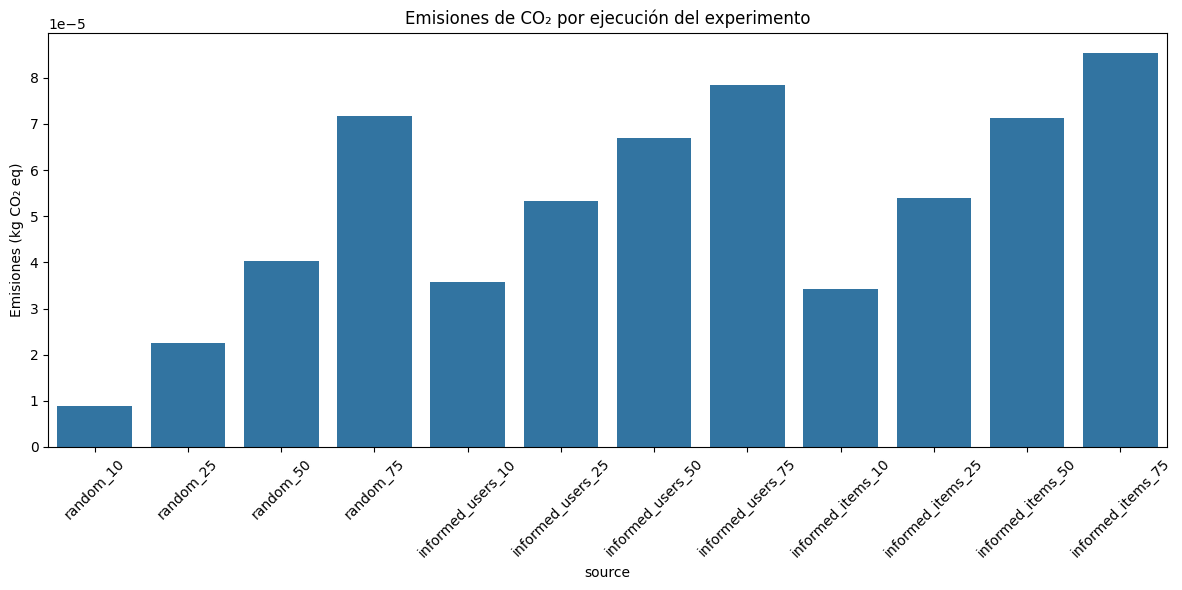

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(x="source", y="emissions", data=emissions_df)
plt.xticks(rotation=45)
plt.ylabel("Emisiones (kg CO₂ eq)")
plt.title("Emisiones de CO₂ por ejecución del experimento")
plt.tight_layout()
plt.show()

## Conclusiones preliminares

- Las emisiones aumentan con el tamaño del dataset.
- Los modelos entrenados con submuestreo informado pueden reducir emisiones si mantienen rendimiento comparable.
- Este análisis permite evaluar la eficiencia energética junto con las métricas de precisión que se estudiarán en el Notebook 9.